In [5]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
train_df = pd.read_csv('train.csv')

In [4]:
train_df['Calculated_Hardness'] = 2.5 * train_df['Calcium'] + 4.1 * train_df['Magnesium']

In [5]:
print(train_df[['id', 'Calcium', 'Magnesium', 'Calculated_Hardness']])

        id  Calcium  Magnesium  Calculated_Hardness
0        0     24.0        7.1                89.11
1        1     41.0        6.5               129.15
2        2     51.0        9.1               164.81
3        3     13.0        2.7                43.57
4        4    147.0       48.0               564.30
...    ...      ...        ...                  ...
6395  6395     58.0       25.0               247.50
6396  6396      5.7        3.7                29.42
6397  6397     40.3       14.2               158.97
6398  6398    110.0       47.0               467.70
6399  6399     63.1       11.2               203.67

[6400 rows x 4 columns]


In [41]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X = train_df.drop(['id', 'Hardness'], axis=1)
y = train_df['Hardness']
X_test = test_df.drop(['id'], axis=1)

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

In [45]:
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

In [46]:
print(f"Train Mean Squared Error: {train_mse}")
print(f"Validation Mean Squared Error: {val_mse}")

Train Mean Squared Error: 2250.439123040965
Validation Mean Squared Error: 11244530.33084407


In [6]:
hasil_semua_df = pd.read_csv('hasil_semua.csv')

In [7]:
mean_alkalinity = hasil_semua_df['Alkalinity, total'].mean()

In [8]:
percentile_75_sodium = hasil_semua_df['Sodium'].quantile(0.75)

In [9]:
filtered_data = hasil_semua_df[(hasil_semua_df['Sodium'] > percentile_75_sodium) & (hasil_semua_df['Alkalinity, total'] > mean_alkalinity)]

In [10]:
mean_hardness_filtered = filtered_data['Calculated_Hardness'].mean()
print(f"Rata-rata Hardness: {mean_hardness_filtered}")

Rata-rata Hardness: 1469.3893576923076


In [14]:
Q1 = hasil_semua_df['Alkalinity, total'].quantile(0.25)
Q3 = hasil_semua_df['Alkalinity, total'].quantile(0.75)
IQR = Q3 - Q1

In [15]:
print(IQR)

100.0


In [12]:
outliers = hasil_semua_df[(hasil_semua_df['Alkalinity, total'] < (Q1 - 1.5 * IQR)) | (hasil_semua_df['Alkalinity, total'] > (Q3 + 1.5 * IQR))]

In [13]:
print("Sumber air yang memiliki tingkat kebasaan (Alkalinity) yang dapat dianggap outlier:")
print(outliers)

Sumber air yang memiliki tingkat kebasaan (Alkalinity) yang dapat dianggap outlier:
        id  Alkalinity, total  Calcium  Chloride  Fluoride  Magnesium  \
33    6433              380.0     93.0     340.0     0.170     130.00   
39    6439              490.0     86.0     150.0     0.740     110.00   
105   6505              421.0     54.0     298.0     0.280     127.00   
131   6531              700.0     59.0      24.0     0.350      44.00   
147   6547              470.0    100.0      20.0     0.690      40.00   
238   6638              430.0     26.0     120.0     0.390      23.00   
248   6648              380.0     70.0      40.0     0.330      52.00   
309   6709              390.0     76.0      69.0     0.250      52.00   
369   6769              390.0     74.0      72.0     0.170      51.00   
408   6808              410.0     41.0      51.0     0.130      30.00   
458   6858              390.0     81.0      82.0     0.110      16.00   
526   6926              400.0     74.6  

In [19]:
correlation = hasil_semua_df['Specific Conductivity'].corr(hasil_semua_df['Calculated_Hardness'])
correlation

0.012407962520392246

In [20]:
import matplotlib.pyplot as plt

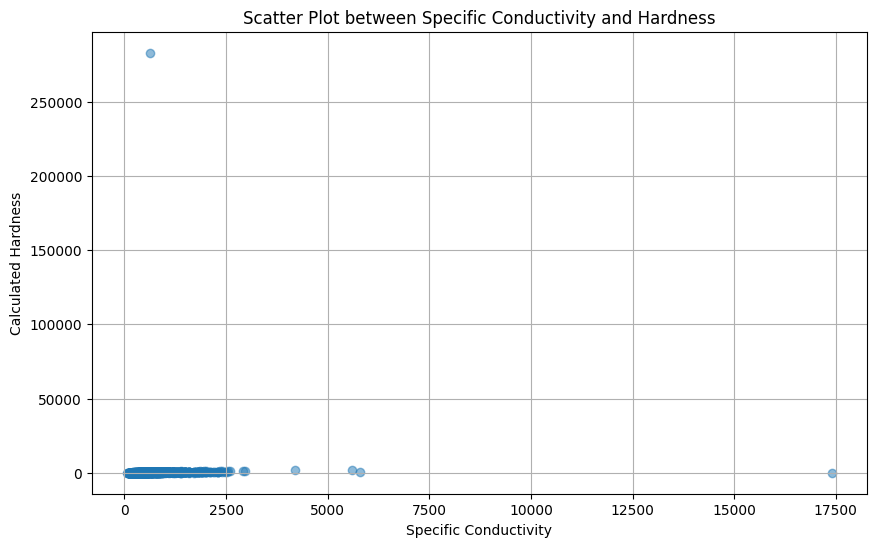

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(hasil_semua_df['Specific Conductivity'], hasil_semua_df['Calculated_Hardness'], alpha=0.5)
plt.title('Scatter Plot between Specific Conductivity and Hardness')
plt.xlabel('Specific Conductivity')
plt.ylabel('Calculated Hardness')
plt.grid(True)
scatter_plot = plt.show()

In [22]:
df = pd.read_csv('/content/test.csv')
df.head()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids
0,6400,93.0,15.9,3.6,0.100,11.9,1.40,12.7,208.0,6.5,156.0
1,6401,180.0,34.0,200.0,1.900,8.2,1.30,300.0,1700.0,210.0,860.0
2,6402,95.0,44.0,35.0,0.081,3.3,1.10,28.0,390.0,22.0,240.0
3,6403,110.0,29.0,12.0,0.250,6.0,0.15,23.0,283.0,15.0,190.0
4,6404,179.0,59.0,51.7,0.160,45.0,4.10,64.0,976.0,170.0,430.0


In [23]:
correlations = hasil_semua_df.corr()['Calculated_Hardness'].drop('Calculated_Hardness')

In [24]:
print(correlations)

id                        0.038392
Alkalinity, total         0.059946
Calcium                   0.032069
Chloride                  0.006563
Fluoride                 -0.008318
Magnesium                 0.999891
Nitrate as N              0.021977
Sodium                    0.874971
Specific Conductivity     0.012408
Sulfate                   0.005521
Total Dissolved Solids    0.015887
Name: Calculated_Hardness, dtype: float64


In [26]:
most_influential = correlations.abs().idxmax()
least_influential = correlations.abs().idxmin()

In [27]:
print(f"Zat yang paling mempengaruhi Hardness: {most_influential} (Koefisien Korelasi: {correlations[most_influential]})")

Zat yang paling mempengaruhi Hardness: Magnesium (Koefisien Korelasi: 0.9998912630743924)


In [29]:
print(f"Zat yang paling tidak mempengaruhi Hardness: {least_influential} (Koefisien Korelasi: {correlations[least_influential]})")

Zat yang paling tidak mempengaruhi Hardness: Sulfate (Koefisien Korelasi: 0.005521206700246622)


In [17]:
test_df = pd.read_csv('test.csv')

In [31]:
test_df['Calculated_Hardness'] = 2.5 * test_df['Calcium'] + 4.1 * test_df['Magnesium']

In [14]:
print(test_df[['id','Calcium', 'Magnesium', 'Calculated_Hardness']].head())

     id  Calcium  Magnesium  Calculated_Hardness
0  6400     15.9       11.9                88.54
1  6401     34.0        8.2               118.62
2  6402     44.0        3.3               123.53
3  6403     29.0        6.0                97.10
4  6404     59.0       45.0               332.00


In [32]:
pd.set_option('display.max_rows', None)

In [33]:
print(test_df[['id', 'Calcium', 'Magnesium', 'Calculated_Hardness']])

        id  Calcium  Magnesium  Calculated_Hardness
0     6400   15.900     11.900              88.5400
1     6401   34.000      8.200             118.6200
2     6402   44.000      3.300             123.5300
3     6403   29.000      6.000              97.1000
4     6404   59.000     45.000             332.0000
5     6405   47.000      7.700             149.0700
6     6406   61.000      9.000             189.4000
7     6407   64.000     14.000             217.4000
8     6408   73.000     22.000             272.7000
9     6409   19.000      3.600              62.2600
10    6410   17.000      7.700              74.0700
11    6411   35.000     24.000             185.9000
12    6412  115.000     32.000             418.7000
13    6413   27.000      3.900              83.4900
14    6414   53.000     27.000             243.2000
15    6415   75.000     34.000             326.9000
16    6416   24.000      6.000              84.6000
17    6417   36.000     15.000             151.5000
18    6418  

In [18]:
correlation_matrix = test_df.corr()

In [19]:
high_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)

In [20]:
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1]
high_corr_pairs = high_corr_pairs[~high_corr_pairs.duplicated()]

In [21]:
threshold = 0.7
high_corr_pairs = high_corr_pairs[high_corr_pairs > threshold]

In [22]:
print(high_corr_pairs)

Sodium                  Magnesium    0.874985
Total Dissolved Solids  Calcium      0.728344
Sulfate                 Calcium      0.710098
dtype: float64


In [49]:
X = test_df.drop(columns=['id', 'Total Dissolved Solids'])
y = test_df['Total Dissolved Solids']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = model.predict(X_test)

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [56]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 50.88437241408684


In [57]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 6475.534239626443


In [58]:
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 80.47070423220144


In [59]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

R-squared (R²): 0.8768671964068476


In [60]:
n = len(y_test)  # Number of samples
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1-r2) * (n-1) / (n-p-1)
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2}")

Adjusted R-squared (Adjusted R²): 0.8728951704844878


In [18]:
submission_df = test_df[['id', 'Calculated_Hardness']]
submission_df.to_csv('submission.csv', index=False)